In [9]:
import seaborn as sns
from matplotlib import pyplot as plt
plt.style.use('tableau-colorblind10')
sns.set(font_scale=2.5)
import pandas  as pd
import missingno as msno
import numpy as np

df= pd.read_csv('penguin.csv')
# f, ax = plt.subplots(1,3,figsize=(18,6))
# sns.barplot(data=df, x="island", y="body_mass_g",ax=ax[0])
# sns.barplot(data=df, x="island", y="body_mass_g", errorbar="sd",ax=ax[1])
# sns.barplot(
#     data=df, x="body_mass_g", y="island",
#     errorbar=("pi", 50), capsize=.4, errcolor=".5",
#     linewidth=3, edgecolor=".5", facecolor=(0, 0, 0, 0),ax=ax[2]
# )


In [27]:
df
# bill_length_mm : 부리 가로길이
# bill_depth_mm : 부리 세로길이
# flipper_length_mm : 팔 길이
# body_mass_g : 몸무게(g)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


species             의 NaN value는 0개, 0.00%
island              의 NaN value는 0개, 0.00%
bill_length_mm      의 NaN value는 2개, 0.58%
bill_depth_mm       의 NaN value는 2개, 0.58%
flipper_length_mm   의 NaN value는 2개, 0.58%
body_mass_g         의 NaN value는 2개, 0.58%
sex                 의 NaN value는 11개, 3.20%


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/missingno/missingno.py:61: UserWarning: Plotting a sparkline on an existing axis is not currently supported. To remove this warning, set sparkline=False.
  warnings.warn(


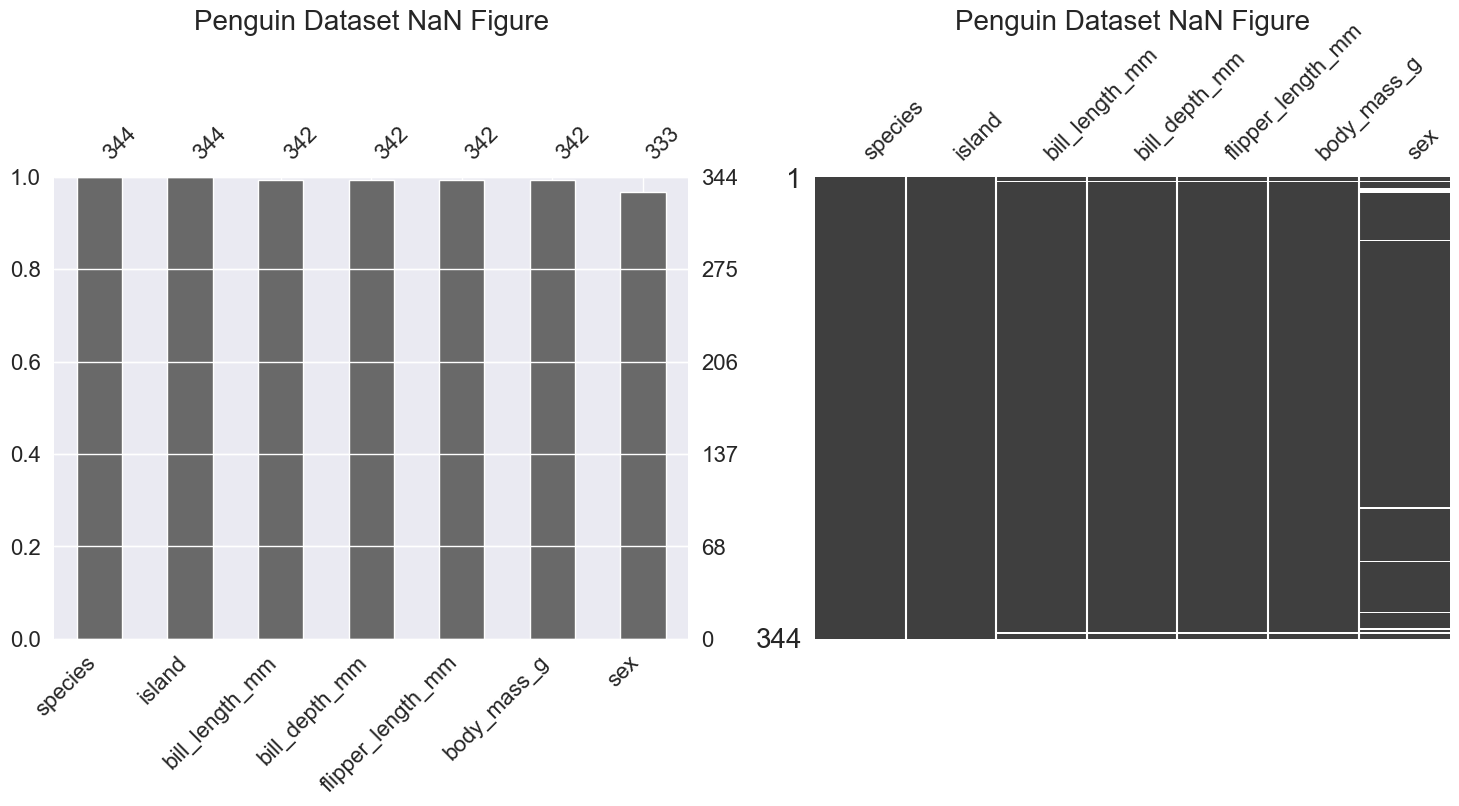

In [22]:
##### NULL확인. 근데 별로 없네?
for col in df.columns :
    print('{:<20}의 NaN value는 {}개, {:.2f}%'.format(col, df[col].isnull().sum(), 100*df[col].isnull().sum()/len(df)))

y_position = 1.3
font_size = 20
f,ax = plt.subplots(1,2,figsize=(18,6))

msno.bar(df=df,ax=ax[0])
msno.matrix(df=df,ax=ax[1])
ax[0].set_title('Penguin Dataset NaN Figure', fontsize=font_size, y=y_position)
ax[1].set_title('Penguin Dataset NaN Figure', fontsize=font_size, y=y_position)

plt.show()

In [26]:
for col in df.columns : 
    print('{}의 value_counts'.format(col))
    print(df[col].value_counts())
    print('='*50)

species의 value_counts
Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64
island의 value_counts
Biscoe       168
Dream        124
Torgersen     52
Name: island, dtype: int64
bill_length_mm의 value_counts
41.1    7
45.2    6
39.6    5
50.5    5
50.0    5
       ..
35.6    1
36.8    1
43.1    1
38.5    1
49.9    1
Name: bill_length_mm, Length: 164, dtype: int64
bill_depth_mm의 value_counts
17.0    12
18.6    10
17.9    10
15.0    10
18.5    10
        ..
13.2     1
14.9     1
21.5     1
20.2     1
17.4     1
Name: bill_depth_mm, Length: 80, dtype: int64
flipper_length_mm의 value_counts
190.0    22
195.0    17
187.0    16
193.0    15
210.0    14
191.0    13
215.0    12
197.0    10
196.0    10
185.0     9
220.0     8
198.0     8
208.0     8
216.0     8
212.0     7
186.0     7
181.0     7
189.0     7
230.0     7
192.0     7
184.0     7
199.0     6
213.0     6
188.0     6
214.0     6
217.0     6
222.0     6
201.0     6
219.0     5
209.0     5
218.0     5
221.0     5
20

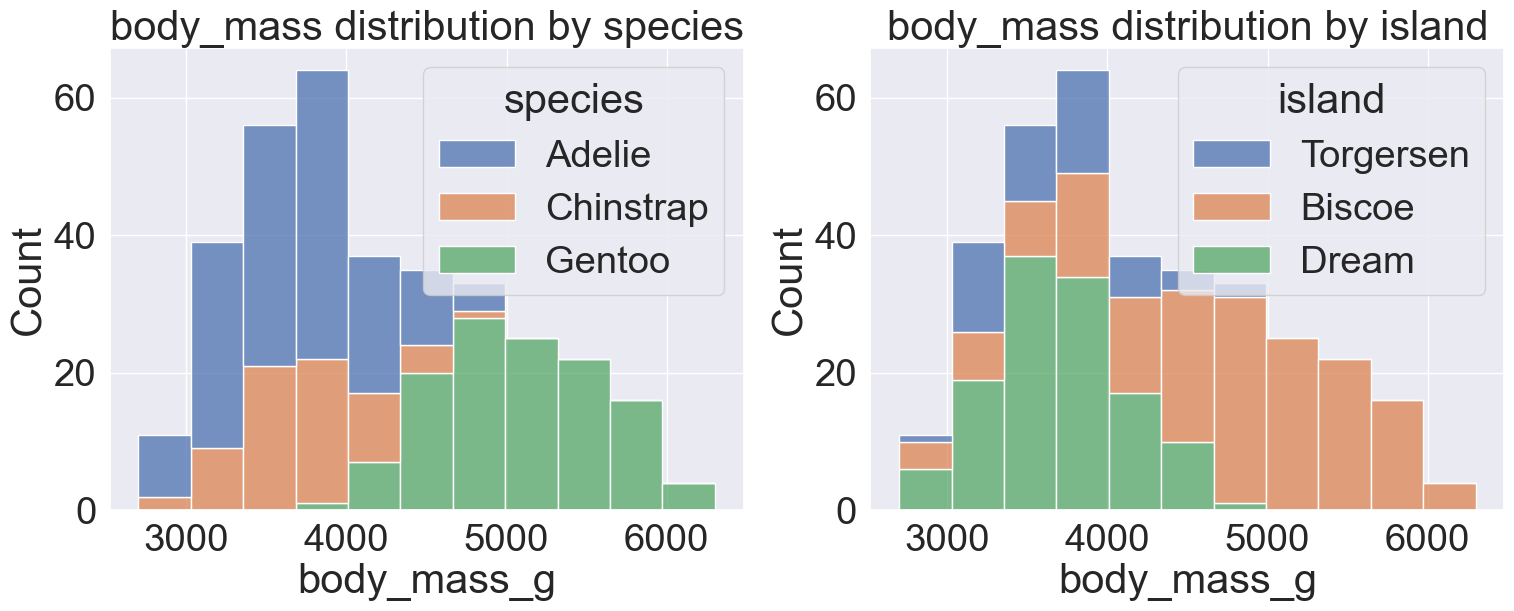

In [44]:
##### 몸무게 별로 숫자를 확인해봄
##### figure 1에서 hue='species'했더니 A, C는 분포양상이 비슷하지만 G는 몸뭄게가 크다는걸 알 수 있었다.
##### figure 2에서 hue='island'했더니 Biscoe섬이 대체로 몸무게가 많이 나가고 Torgersen과 Dream은 분포는 비슷하지만 개체수가 Dream이 더 많았다.

f,ax = plt.subplots(1,2,figsize=(18,6))
sns.histplot(data=df, x='body_mass_g', hue='species', multiple='stack', ax=ax[0])
sns.histplot(data=df, x='body_mass_g', hue='island', multiple='stack', ax=ax[1])

ax[0].set_title('body_mass distribution by species')
ax[1].set_title('body_mass distribution by island')
plt.show()